<a href="https://colab.research.google.com/github/abhishekgit03/Zomato-Dataset-/blob/main/ZomatoDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/content/drive/MyDrive/MLDatasets/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
print("Percentage of values missing:")
for i in df.columns:
  print(i,"=",100-(((len(df)-df[i].isnull().sum())/len(df))*100))
  

Percentage of values missing:
url = 0.0
address = 0.0
name = 0.0
online_order = 0.0
book_table = 0.0
rate = 15.033741322969234
votes = 0.0
phone = 2.3357890055494437
location = 0.040605603573297344
rest_type = 0.43892723862559535
dish_liked = 54.29162557766305
cuisines = 0.08701200765706574
approx_cost(for two people) = 0.6690256588742614
reviews_list = 0.0
menu_item = 0.0
listed_in(type) = 0.0
listed_in(city) = 0.0


In [7]:
df=df.drop(["url","dish_liked","menu_item","address","phone","dish_liked","reviews_list"],axis="columns")

In [8]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


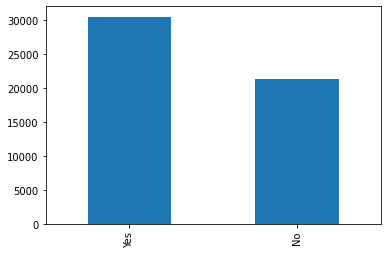

In [9]:
y=df["online_order"].value_counts()
y.plot(kind="bar")

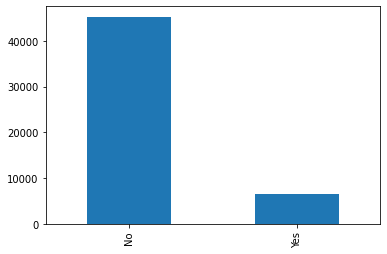

In [10]:
y=df["book_table"].value_counts()
y.plot(kind="bar")

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Rate Cleaning

In [41]:
def cleanrate(value):
  if value in ['NEW','nan','-']:
    return np.nan
  else:
    value=str(value).split("/")
    return float(value[0])
df['rate']=df['rate'].apply(cleanrate)
df.fillna(df['rate'].mean(),inplace=True)

In [42]:
df.dropna(inplace=True)

In [43]:
df=df.drop("listed_in(city)",axis="columns")

KeyError: ignored

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
location=pd.DataFrame(df.groupby(["location"]).size())
location.head(10)
location.plot(kind="bar",figsize=(20, 5))

# Renaming columns

In [19]:
df=df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type"})

In [20]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [21]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 3.700141861024285,
       '1,400', '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330',
       '2,500', '2,100', '3,000', '2,800', '3,400', '40', '1,250',
       '3,500', '4,000', '2,400', '2,600', '120', '1,450', '469', '70',
       '3,200', '60', '560', '240', '360', '6,000', '1,050', '2,300',
       '4,100', '5,000', '3,700', '1,650', '2,700', '4,500', '140'],
      dtype=object)

# Cost cleaning

In [22]:
s=""
def func(value):
  s=""
  for i in str(value):
    if i!=",":
      s=s+i;
  return float(s); 
df['cost']=df['cost'].apply(func)

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cleaning Rest Column

In [24]:
type=df["rest_type"].value_counts()

In [25]:
rest_type_below_1000=type[type<1000]
rest_type_below_1000

Beverage Shop                 865
Bar                           697
Food Court                    621
Sweet Shop                    468
Bar, Casual Dining            420
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 86, dtype: int64

In [26]:
def clean_type(value):
  if value in rest_type_below_1000:
    return "others"
  else:
    return value
df["rest_type"]=df["rest_type"].apply(clean_type)

In [27]:
df["rest_type"].value_counts()

Quick Bites           19096
Casual Dining         10309
others                 9298
Cafe                   3727
Delivery               2600
Dessert Parlor         2260
Takeaway, Delivery     2031
Casual Dining, Bar     1148
Bakery                 1140
Name: rest_type, dtype: int64

In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cleaning Location Column

In [39]:
location=df["location"].value_counts()
location_below_200=location[location<200]
location_below_200
def clean_type(value):
  if value in location_below_200:
    return "others"
  else:
    return value
df["location"]=df["location"].apply(clean_type)

In [40]:
df["location"].value_counts()

BTM                      5109
others                   3454
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
Indiranagar              2075
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1628
Bellandur                1283
Electronic City          1256
Koramangala 1st Block    1237
Brigade Road             1210
Koramangala 7th Block    1179
Koramangala 6th Block    1154
Sarjapur Road            1063
Ulsoor                   1017
Koramangala 4th Block    1017
MG Road                   917
Banashankari              904
Kalyan Nagar              853
Richmond Road             811
Malleshwaram              722
Frazer Town               720
Basavanagudi              684
Residency Road            672
Banaswadi                 659
Brookefield               658
New BEL Road              649
Kammanahalli              647
Rajajinagar               591
Church Street             566
Lavelle Ro

# Cleaning Cuisines Column

In [56]:
cuisine=df["cuisines"].value_counts()
cuisine_below_100=cuisine[cuisine<100]
def clean_cuisine(value):
  if value in cuisine_below_100:
    return "others"
  else:
    return value
df["cuisines"]=df["cuisines"].apply(clean_cuisine)

In [57]:
df["cuisines"].value_counts()

others                                 35225
North Indian                            2907
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  915
Bakery, Desserts                         910
Fast Food                                801
Desserts                                 760
Cafe                                     755
South Indian, North Indian, Chinese      726
Bakery                                   651
Chinese                                  554
Ice Cream, Desserts                      416
Chinese, North Indian                    415
Mithai, Street Food                      372
Desserts, Ice Cream                      353
North Indian, Chinese, Biryani           351
South Indian, North Indian               343
North Indian, South Indian               342
North Indian, South Indian, Chinese      305
Beverages                                301
Name: cuisines, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


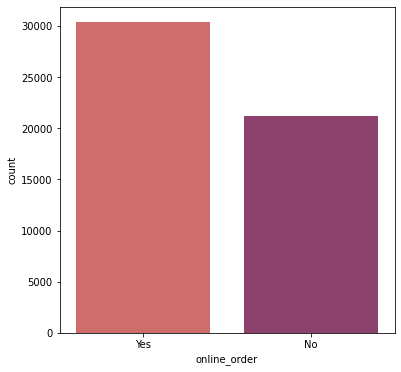

In [35]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(df["online_order"],palette="flare")

# Online Order VS Rate

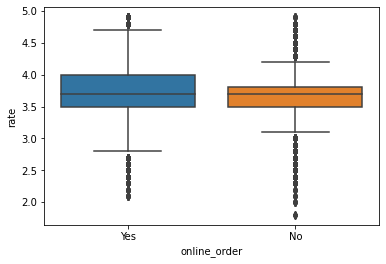

In [36]:
sns.boxplot(x="online_order",y="rate",data=df)

# Book Table VS Rate

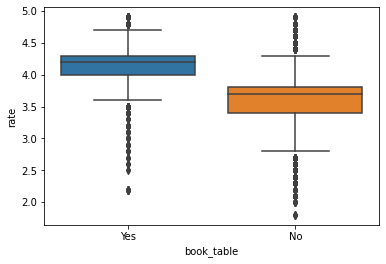

In [38]:
sns.boxplot(x="book_table",y="rate",data=df)

# Online Order Location Wise Analysis

In [45]:
newdf=df.groupby(['location','online_order'])['name'].count()
newdf.to_csv('location_online.csv')
newdf=pd.read_csv('location_online.csv')
newdf=pd.pivot_table(newdf,values=None,index=['location'],columns=['online_order'],fill_value=0)
newdf

name      
online_order             No   Yes
location                         
BTM                    1789  3320
Banashankari            397   507
Banaswadi               321   338
Bannerghatta Road       704   924
Basavanagudi            243   441
Bellandur               523   760
Bommanahalli            123   115
Brigade Road            552   658
Brookefield             241   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  261   235
Ejipura                 219   219
Electronic City         681   575
Frazer Town             293   427
HSR                     602  1919
Indiranagar             743  1332
JP Nagar                917  1317
Jayanagar               562  1364
Jeevan Bhima Nagar       68   204
Kalyan Nagar            355   498
Kammanahalli            267   380
Koramangala 1st Block   385   852
Koramangala 3rd Block    91   124
Koramangala 4th Block   459   558
Koramangala 5th Block   889  1613
Koramangala 6th Block   457   697
Koramangala 7th Block   394   785
Koramangala 8th Block   108   212
Lavelle Road            321   203
MG Road                 544   373
Malleshwaram            310   412
Marathahalli            734  1109
New BEL Road            257   392
Old Airport Road        230   216
Rajajinagar             286   305
Residency Road          425   247
Richmond Road           565   246
Sarjapur Road           335   728
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          185   167
Ulsoor                  395   622
Vasanth Nagar           148   147
Whitefield             1005  1135
Wilson Garden           112   134
others                 1487  1967

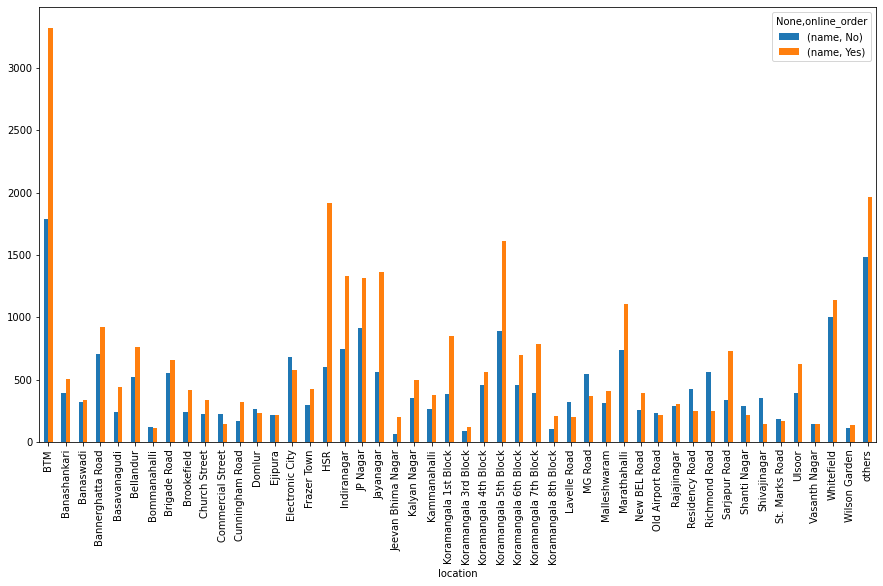

In [46]:
newdf.plot(kind="bar",figsize=(15,8))

# Book Table Location Wise Analysis

In [47]:
newdf1=df.groupby(['location','book_table'])['name'].count()
newdf1.to_csv('booktable_online.csv')
newdf1=pd.read_csv('booktable_online.csv')
newdf1=pd.pivot_table(newdf1,values=None,index=['location'],columns=['book_table'],fill_value=0)
newdf1

name     
book_table               No  Yes
location                        
BTM                    4942  167
Banashankari            841   63
Banaswadi               651    8
Bannerghatta Road      1529   99
Basavanagudi            668   16
Bellandur              1185   98
Bommanahalli            235    3
Brigade Road           1034  176
Brookefield             584   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  441   55
Ejipura                 438    0
Electronic City        1158   98
Frazer Town             712    8
HSR                    2304  217
Indiranagar            1627  448
JP Nagar               1919  315
Jayanagar              1647  279
Jeevan Bhima Nagar      268    4
Kalyan Nagar            704  149
Kammanahalli            598   49
Koramangala 1st Block  1187   50
Koramangala 3rd Block   106  109
Koramangala 4th Block   695  322
Koramangala 5th Block  1810  692
Koramangala 6th Block  1042  112
Koramangala 7th Block  1017  162
Koramangala 8th Block   303   17
Lavelle Road            296  228
MG Road                 570  347
Malleshwaram            633   89
Marathahalli           1680  163
New BEL Road            593   56
Old Airport Road        387   59
Rajajinagar             550   41
Residency Road          523  149
Richmond Road           695  116
Sarjapur Road           909  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          228  124
Ulsoor                  840  177
Vasanth Nagar           278   17
Whitefield             1887  253
Wilson Garden           241    5
others                 3242  212

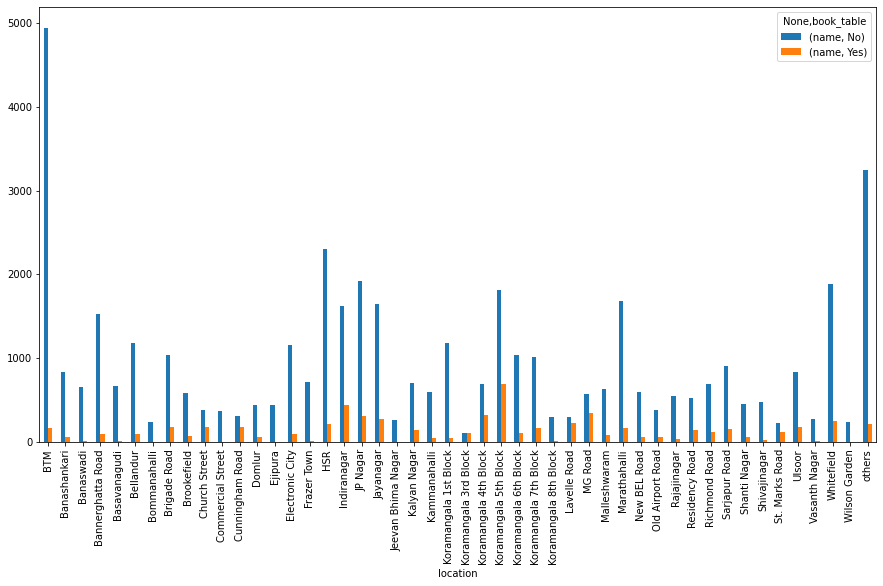

In [48]:
newdf1.plot(kind="bar",figsize=(15,8))

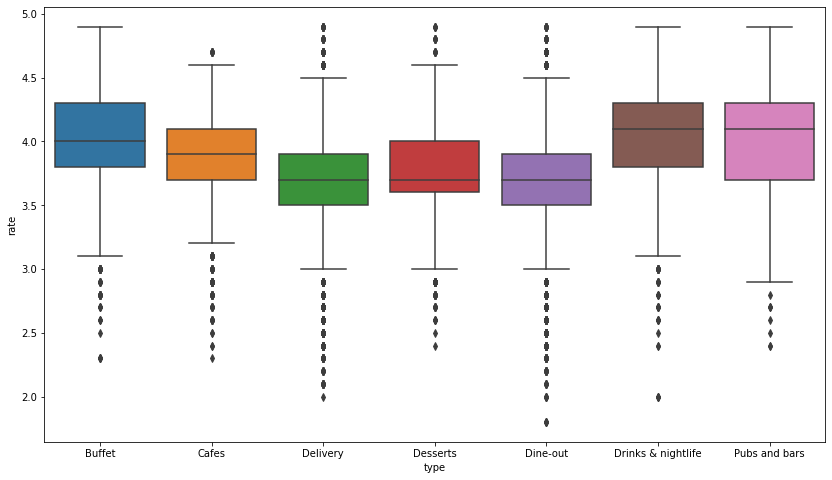

In [50]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate',data=df)

# Cuisine Analysis

In [67]:
df_cuisine=df[['cuisines','votes']]
df_cuisine.drop_duplicates()
df_cuisine.head()

,cuisines,votes
0,others,775
1,others,787
2,others,918
3,"South Indian, North Indian",88
4,others,166


In [70]:
df_cuisine1=df_cuisine.groupby(['cuisines'])['votes'].sum()
df_cuisine1=df_cuisine1.to_frame()
df_cuisine1=df_cuisine1.sort_values('votes',ascending=False)
df_cuisine1=df_cuisine1.iloc[1:, :]
df_cuisine1.head()

,votes
cuisines,
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
Chinese,101728
Cafe,100856


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

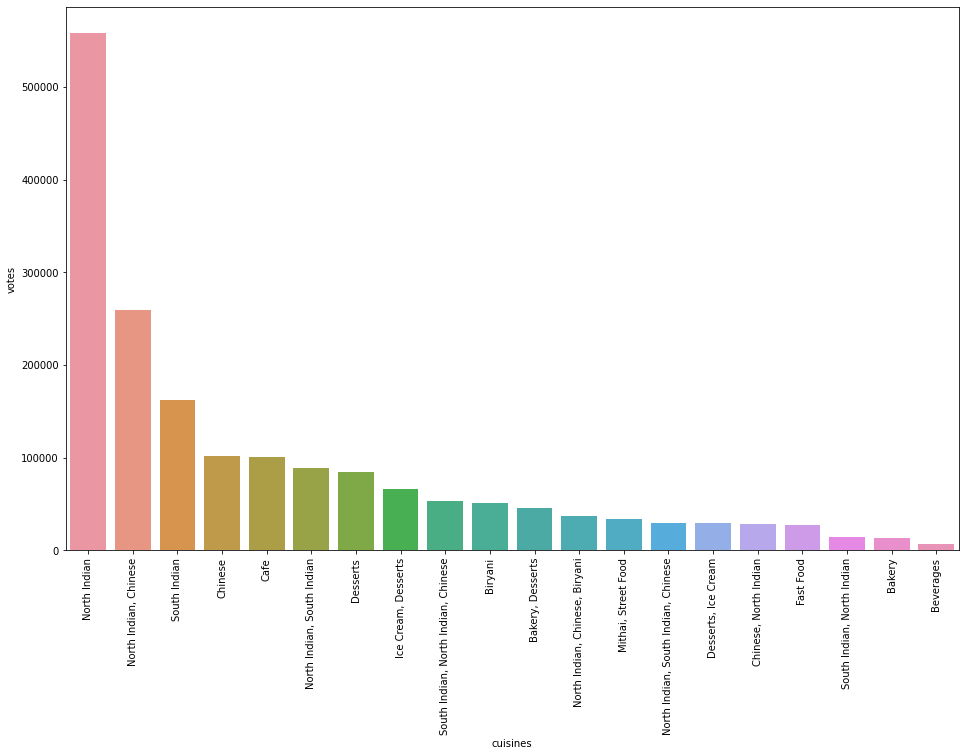

In [71]:
plt.figure(figsize=(16,10))
sns.barplot(df_cuisine1.index,df_cuisine1['votes'])
plt.xticks(rotation=90)

# Restaurents Location wise and Type wise

In [72]:
newdf=df.groupby(['location','type'])['name'].count()
newdf.to_csv('location_type.csv')
newdf=pd.read_csv('location_type.csv')
newdf=pd.pivot_table(newdf,values=None,index=['location'],columns=['type'],fill_value=0)
newdf

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       25    83     3082      202     1676   
Banashankari               7    36      419       71      357   
Banaswadi                  0    24      320       37      271   
Bannerghatta Road          9    46      842      137      583   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      624       77      485   
Bommanahalli               2     1      145       11       77   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      340       45      246   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    17      261       35      144   
Ejipura                    0     0      250       16      172   
Electronic City           23    24      575       71      521   
Frazer Town                1    11      474       56      174   
HSR                       19    49     1714      123      584   
Indiranagar               38   100     1116      146      540   
JP Nagar                  45    76     1159      166      730   
Jayanagar                 27    77     1049      182      579   
Jeevan Bhima Nagar         0     6      141       18      107   
Kalyan Nagar               9    45      370       88      323   
Kammanahalli               2    27      332       35      245   
Koramangala 1st Block      3    26      717       70      398   
Koramangala 3rd Block     19    20       81       17       65   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   151     1082      210      852   
Koramangala 6th Block     18    43      526       70      423   
Koramangala 7th Block     25    52      508      127      417   
Koramangala 8th Block      0    10      213       28       67   
Lavelle Road              30    27      129       50      193   
MG Road                   51    78      271       73      349   
Malleshwaram              11    31      269       85      292   
Marathahalli              37    32      995      107      643   
New BEL Road               4    29      341       34      225   
Old Airport Road          12     5      204       37      167   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      290   
Richmond Road             63    25      257       78      360   
Sarjapur Road             25    23      565       83      326   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      115       10      150   
Ulsoor                    16    56      462       71      359   
Vasanth Nagar              4    16      152       12      106   
Whitefield                28    51     1064      139      778   
Wilson Garden              3     2      133       19       86   
others                    59    79     1971      176     1072   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Bommanahalli                           1             1  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street           

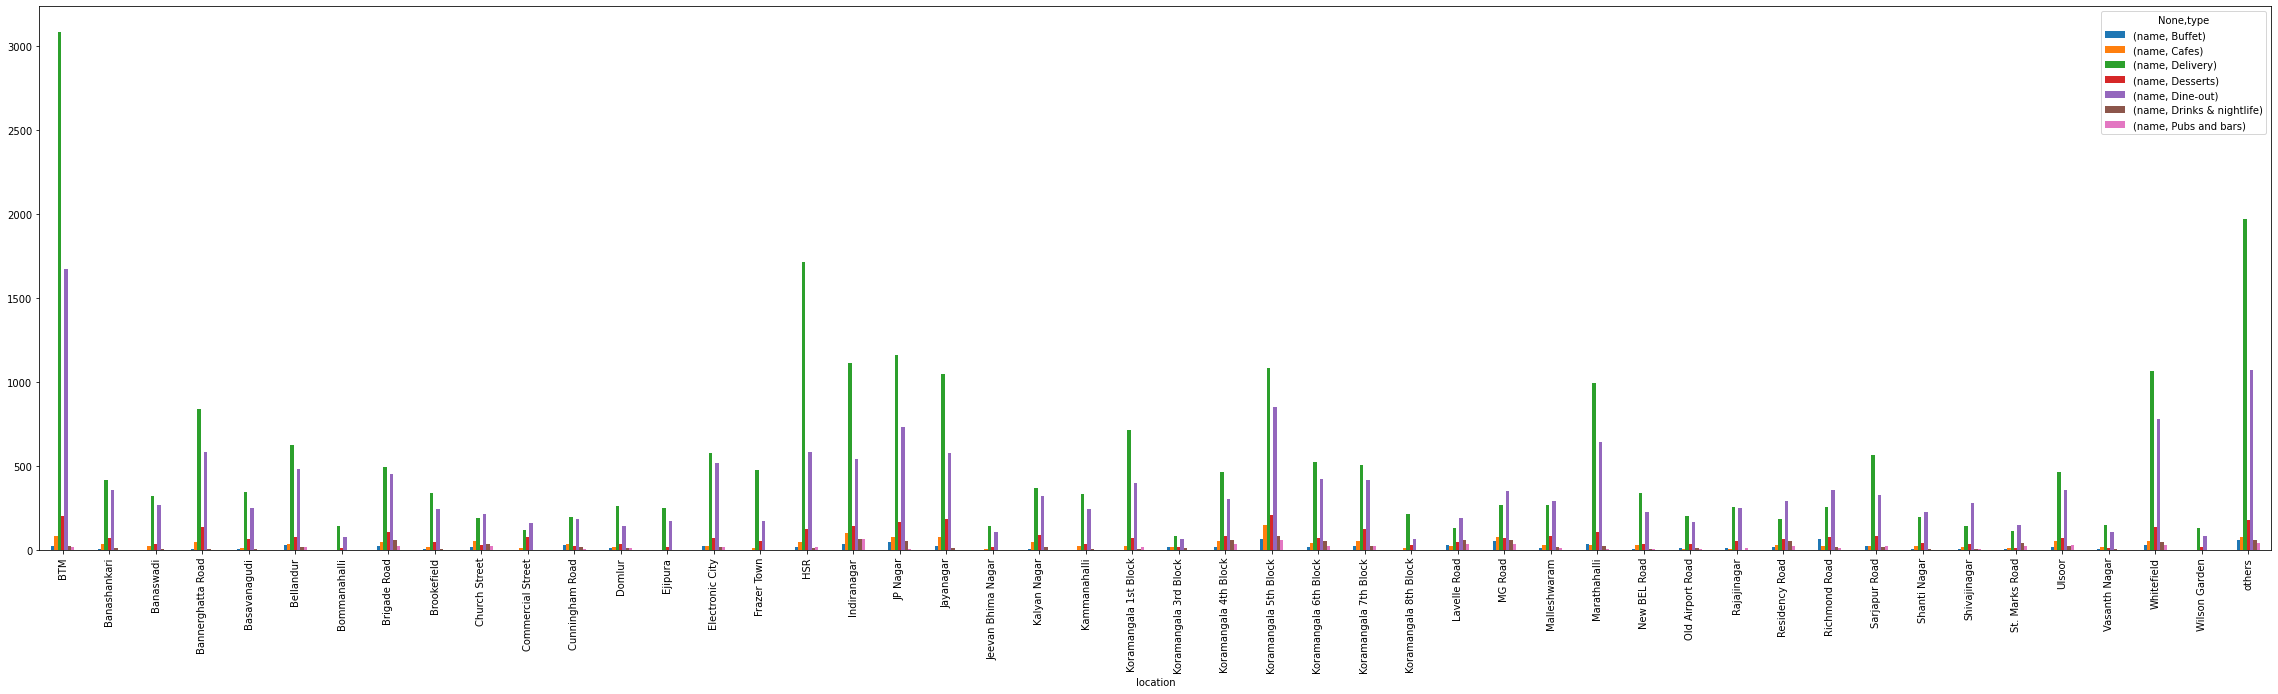

In [73]:
newdf.plot(kind="bar", figsize=(40,10))